In [1]:
%matplotlib inline
!pip install category_encoders
from google.colab import drive
import os
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
drive.mount('/content/drive')
# os.chdir("/content/drive/My Drive/Colab Notebooks/AML")
pd.set_option('display.max_rows', 20)


     |████████████████████████████████| 81kB 10.3MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# cp "/content/drive/My Drive/Colab Notebooks/AML/cell_images.zip"

In [0]:
! cp   "/content/drive/My Drive/Colab Notebooks/AML/cell_images.zip" "/content/cell_images.zip"

In [0]:
 !unzip -q  "/content/cell_images.zip"

In [0]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.layers import Dense, BatchNormalization, Dropout, Activation, Flatten, MaxPooling2D, Conv2D, Add, Input, SpatialDropout2D
from keras.models import Sequential, Model
from keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import os

In [0]:
pos_dir=os.path.join('/content/cell_images', 'Parasitized')
neg_dir=os.path.join('/content/cell_images', 'Uninfected')

In [7]:
pos_n=len(os.listdir(pos_dir))
print(pos_n)

13780


In [8]:
neg_n=len(os.listdir(neg_dir))
print(neg_n)

13780


In [0]:
! mkdir -p "/content/test/Parasitized"

In [0]:
! mkdir -p "/content/test/Uninfected"

In [48]:
! ls -l /content/test/Uninfected/*.* | wc -l

3780


In [0]:
! shuf -zn3780 -e /content/cell_images/Parasitized/*.png | xargs -0 cp -vt "/content/test/Parasitized/"

In [0]:
! shuf -zn3780 -e /content/cell_images/Uninfected/*.png | xargs -0 cp -vt "/content/test/Uninfected"

In [49]:
! ls -l /content/test/Uninfected/*.* | wc -l

3780


In [50]:
! ls -l /content/test/Parasitized/*.* | wc -l

3780


In [62]:
! ls -l /content/test/Parasitized/*.* | head -n 1

-rw-r--r-- 1 root root 14025 May  1 07:55 /content/test/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png


In [0]:
! mkdir -p "/content/test/Uninfected1"

In [72]:
! ls -p /content/test/Uninfected/ | grep -v / | tail -10;

C99P60ThinF_IMG_20150918_141351_cell_53.png
C99P60ThinF_IMG_20150918_141351_cell_75.png
C99P60ThinF_IMG_20150918_141520_cell_45.png
C99P60ThinF_IMG_20150918_141520_cell_64.png
C99P60ThinF_IMG_20150918_141520_cell_9.png
C99P60ThinF_IMG_20150918_142128_cell_11.png
C99P60ThinF_IMG_20150918_142128_cell_3.png
C99P60ThinF_IMG_20150918_142128_cell_47.png
C99P60ThinF_IMG_20150918_142128_cell_53.png
C99P60ThinF_IMG_20150918_142128_cell_55.png


In [0]:
! a=$(ls -p /content/test/Uninfected/ | grep -v /)

In [0]:
!a=`ls -p /content/test/Uninfected/ | grep -v /`

In [0]:
! rm /content/test/Uninfected/*
! rm /content/test/Parasitized/*

In [0]:
! rm -rf  /content/test/Uninfected1

In [0]:
tmp_pos=os.listdir(pos_dir)
tmp_neg=os.listdir(neg_dir)


In [0]:
tmp_pos=tmp_pos[:3780]
tmp_neg=tmp_neg[:3780]

In [0]:
dest_pos='/content/test/Parasitized/'
for file in tmp_pos:
  src='/content/cell_images/Parasitized/'+file.strip()
  shutil.move(src, dest_pos)


In [0]:
dest_neg='/content/test/Uninfected/'
for file in tmp_neg:
  src='/content/cell_images/Uninfected//'+file.strip()
  shutil.move(src, dest_neg)


In [99]:
! ls -l /content/cell_images/Uninfected/* | wc -l

10000


In [0]:
img_gen=ImageDataGenerator(rescale=1./255, validation_split=0.20)
## batch size = 100
## epochs = 6

In [105]:
train_set=img_gen.flow_from_directory(directory='/content/cell_images',batch_size=100,target_size=(100,100), class_mode="binary", subset="training", shuffle=True)

Found 16000 images belonging to 2 classes.


In [106]:
val_set=img_gen.flow_from_directory(directory='/content/cell_images',batch_size=100,target_size=(100,100), class_mode="binary", subset="validation", shuffle=True)

Found 3998 images belonging to 2 classes.


In [108]:
print(val_set[0][1][1])
print(val_set.filenames[1])
print(len(val_set.filenames))


0.0
Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png
3998


In [109]:
print(len(train_set.filenames))

16000


In [0]:
train_n=16000
val_n=3998

In [0]:
label=train_set[0][1][0]
img=train_set[0][0][0]

Text(0.5, 1.0, '0.0')

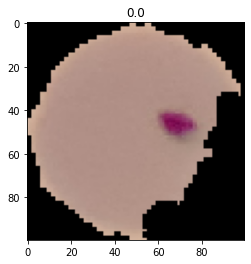

In [113]:
plt.imshow(img)
# mp={1:"Parasitized", 0:"Uinfected"}
plt.title(label)


In [0]:
def build_basic_conv_model():
  model=Sequential()
  model.add(Conv2D(32, 3, input_shape=(100,100,3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  # model.add(Conv2D(32, 3, padding='same', activation='relu'))
  # model.add(BatchNormalization())
  # model.add(MaxPooling2D())
  model.add(Flatten())
  # model.add(Dense(64, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [0]:
model_conv=build_basic_conv_model()


In [0]:
model_conv.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [117]:
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 80001     
Total params: 81,025
Trainable params: 80,961
Non-trainable params: 64
_________________________________________________________________


In [0]:
batch_size=128
epochs=8

train_step=train_n // batch_size
val_step=val_n // batch_size

In [119]:
print(train_step)
print(val_step)

125
31


In [120]:
l_curve=model_conv.fit_generator(train_set,steps_per_epoch=train_step,epochs=epochs, validation_data=val_set, validation_steps=val_step)

Epoch 1/8
125/125 [==============================] - 17s 140ms/step - loss: 0.7837 - accuracy: 0.6347 - val_loss: 0.6102 - val_accuracy: 0.5245
Epoch 2/8
125/125 [==============================] - 17s 132ms/step - loss: 0.5661 - accuracy: 0.7108 - val_loss: 0.6315 - val_accuracy: 0.6269
Epoch 3/8
125/125 [==============================] - 16s 130ms/step - loss: 0.4312 - accuracy: 0.8118 - val_loss: 0.5755 - val_accuracy: 0.6288
Epoch 4/8
125/125 [==============================] - 16s 131ms/step - loss: 0.3605 - accuracy: 0.8603 - val_loss: 0.5280 - val_accuracy: 0.7053
Epoch 5/8
125/125 [==============================] - 16s 128ms/step - loss: 0.2790 - accuracy: 0.8955 - val_loss: 0.4452 - val_accuracy: 0.6945
Epoch 6/8
125/125 [==============================] - 17s 133ms/step - loss: 0.2137 - accuracy: 0.9265 - val_loss: 0.5291 - val_accuracy: 0.7121
Epoch 7/8
125/125 [==============================] - 16s 130ms/step - loss: 0.2203 - accuracy: 0.9191 - val_loss: 0.8302 - val_accuracy:

In [0]:
arr=l_curve.history
df=pd.DataFrame(arr)

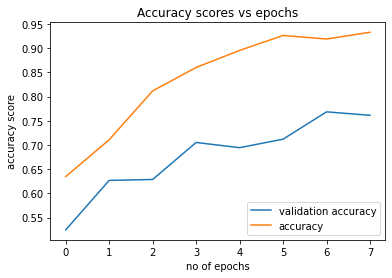

<Figure size 4320x720 with 0 Axes>

In [122]:
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

In [209]:
model_conv.evaluate_generator(test_set)

[0.5362948179244995, 0.7969576716423035]

In [0]:
def build_basic_conv_model2():
  model=Sequential()
  model.add(Conv2D(32, 3, input_shape=(100,100,3), padding='same', activation='relu'))
  model.add(SpatialDropout2D(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(32, 3, padding='same', activation='relu'))
  model.add(SpatialDropout2D(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Flatten())
  # model.add(Dense(128, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [0]:
model_conv2=build_basic_conv_model2()

In [0]:
model_conv2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [126]:
model_conv2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
spatial_dropout2d_3 (Spatial (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
spatial_dropout2d_4 (Spatial (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 32)       

In [127]:
l_curve2=model_conv2.fit_generator(train_set,steps_per_epoch=train_step, epochs=epochs, validation_data=val_set, validation_steps=val_step)

Epoch 1/8
125/125 [==============================] - 19s 150ms/step - loss: 0.9515 - accuracy: 0.5926 - val_loss: 0.6503 - val_accuracy: 0.6813
Epoch 2/8
125/125 [==============================] - 17s 140ms/step - loss: 0.6450 - accuracy: 0.6900 - val_loss: 0.7780 - val_accuracy: 0.5036
Epoch 3/8
125/125 [==============================] - 17s 138ms/step - loss: 0.4455 - accuracy: 0.8042 - val_loss: 1.5944 - val_accuracy: 0.5048
Epoch 4/8
125/125 [==============================] - 17s 139ms/step - loss: 0.3963 - accuracy: 0.8384 - val_loss: 0.7144 - val_accuracy: 0.6330
Epoch 5/8
125/125 [==============================] - 17s 137ms/step - loss: 0.2627 - accuracy: 0.9030 - val_loss: 0.6610 - val_accuracy: 0.7432
Epoch 6/8
125/125 [==============================] - 18s 140ms/step - loss: 0.1889 - accuracy: 0.9313 - val_loss: 0.3359 - val_accuracy: 0.9099
Epoch 7/8
125/125 [==============================] - 17s 137ms/step - loss: 0.1805 - accuracy: 0.9390 - val_loss: 0.2736 - val_accuracy:

In [0]:
arr=l_curve2.history
df=pd.DataFrame(arr)

In [129]:
df.head()

,val_loss,val_accuracy,loss,accuracy
0,0.650325,0.681290,0.951546,0.59264
1,0.778034,0.503551,0.645028,0.69000
2,1.594430,0.504842,0.445524,0.80416
3,0.714446,0.632989,0.396324,0.83840
4,0.661045,0.743226,0.262724,0.90296


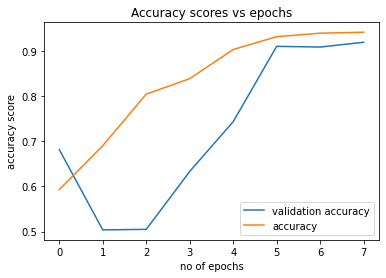

<Figure size 4320x720 with 0 Axes>

In [130]:
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

In [207]:
img_gen2=ImageDataGenerator(rescale=1./255)
test_set=img_gen2.flow_from_directory(directory='/content/test',batch_size=100,target_size=(100,100), class_mode="binary", shuffle=True)

Found 7560 images belonging to 2 classes.


In [138]:
model_conv2.evaluate_generator(test_set)

[0.2210436761379242, 0.9318783283233643]

We notice that the model with spatial dropout performs better than the model with only batch normalization on the test set.

**3.2**

In [139]:
## using image augmentations
img_gen=ImageDataGenerator(rescale=1./255, validation_split=0.20,zoom_range=0.25, rotation_range=30, horizontal_flip=True)
train_set=img_gen.flow_from_directory(directory='/content/cell_images',batch_size=100,target_size=(100,100), class_mode="binary", subset="training", shuffle=True)
val_set=img_gen.flow_from_directory(directory='/content/cell_images',batch_size=100,target_size=(100,100), class_mode="binary", subset="validation", shuffle=True)

Found 16000 images belonging to 2 classes.
Found 3998 images belonging to 2 classes.


In [0]:
model_conv2=build_basic_conv_model2()
model_conv2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
batch_size=100
epochs=8

train_step=train_n // batch_size
val_step=val_n // batch_size

In [143]:
l_curve3=model_conv2.fit_generator(train_set,steps_per_epoch=train_step, epochs=epochs, validation_data=val_set, validation_steps=val_step)

Epoch 1/8
160/160 [==============================] - 65s 405ms/step - loss: 0.5111 - accuracy: 0.7614 - val_loss: 1.9638 - val_accuracy: 0.5090
Epoch 2/8
160/160 [==============================] - 62s 386ms/step - loss: 0.3557 - accuracy: 0.8628 - val_loss: 0.3770 - val_accuracy: 0.7337
Epoch 3/8
160/160 [==============================] - 62s 386ms/step - loss: 0.2854 - accuracy: 0.8976 - val_loss: 0.3352 - val_accuracy: 0.8953
Epoch 4/8
160/160 [==============================] - 62s 384ms/step - loss: 0.2651 - accuracy: 0.9109 - val_loss: 0.4124 - val_accuracy: 0.9074
Epoch 5/8
160/160 [==============================] - 64s 397ms/step - loss: 0.2608 - accuracy: 0.9121 - val_loss: 0.2393 - val_accuracy: 0.9115
Epoch 6/8
160/160 [==============================] - 63s 392ms/step - loss: 0.2430 - accuracy: 0.9208 - val_loss: 0.2247 - val_accuracy: 0.8999
Epoch 7/8
160/160 [==============================] - 61s 381ms/step - loss: 0.2467 - accuracy: 0.9218 - val_loss: 0.1462 - val_accuracy:

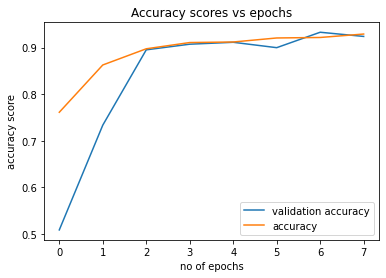

<Figure size 4320x720 with 0 Axes>

In [144]:
arr=l_curve3.history
df=pd.DataFrame(arr)
plt.plot(df['val_accuracy'], label='validation accuracy')
plt.plot(df['accuracy'], label='accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

In [208]:
model_conv2.evaluate_generator(test_set)

[0.1139325425028801, 0.946825385093689]

We notice that the model with data augmentation performs only a little bit better than the original model, suggesting that image orientations were not important for the feature maps for this dataset.





**3.3**

In [180]:
img_gen=ImageDataGenerator(rescale=1./255, validation_split=0.20)
train_set=img_gen.flow_from_directory(directory='/content/cell_images',batch_size=100,target_size=(120,120), class_mode="binary", subset="training", shuffle=True)
val_set=img_gen.flow_from_directory(directory='/content/cell_images',batch_size=100,target_size=(120,120), class_mode="binary", subset="validation", shuffle=True)

Found 16000 images belonging to 2 classes.
Found 3998 images belonging to 2 classes.


In [181]:
img_gen2=ImageDataGenerator(rescale=1./255)
test_set=img_gen2.flow_from_directory(directory='/content/test',batch_size=100,target_size=(120,120), class_mode="binary", shuffle=True)

Found 7560 images belonging to 2 classes.


In [0]:
def build_deep_model(res=0):
  inp=Input(shape=(120,120,3))
  cv=Conv2D(32,3,padding='same', activation='relu')(inp)
  bn=(cv)
  out1=MaxPooling2D()(bn)

  cv2=Conv2D(32,3,padding='same', activation='relu')(out1)
  bn2=(cv2)
  cv2=Conv2D(32,3,padding='same', activation='relu')(bn2)
  bn2=(cv2)
  if res==0:
    out2=bn2
  if res==1:
    out2=Add()([out1, bn2])
  out2=MaxPooling2D()(out2)


  cv3=Conv2D(32,3,padding='same', activation='relu')(out2)
  bn3=(cv3)
  cv3=Conv2D(32,3,padding='same', activation='relu')(bn3)
  bn3=(cv3)
  if res==0:
    out3=bn3
  if res==1:
    out3=Add()([out2, bn3])
  out3=MaxPooling2D()(out3)

  cv4=Conv2D(64,3,padding='same', activation='relu')(out3)
  bn4=(cv4)
  cv4=Conv2D(64,3,padding='same', activation='relu')(bn4)
  bn4=(cv4)
  if res==0:
    out4=bn4
  if res==1:
    out4=bn4
    # out4=Add()([out3, bn4])
  out4=MaxPooling2D()(out4)


  cv5=Conv2D(64,3,padding='same', activation='relu')(out4)
  bn5=(cv5)
  cv5=Conv2D(64,3,padding='same', activation='relu')(bn5)
  bn5=(cv5)
  if res==0:
    out5=bn5
  if res==1:
    out5=Add()([out4, bn5])
  out5=MaxPooling2D()(out5)

  cv6=Conv2D(128,3,padding='same', activation='relu')(out5)
  bn6=(cv6)
  cv6=Conv2D(128,3,padding='same', activation='relu')(bn6)
  bn6=(cv6)
  if res==0:
    out6=bn6
  if res==1:
    out6=bn6
    # out6=Add()([out6, bn6])
  out6=MaxPooling2D()(out6)


  cv7=Conv2D(128,3,padding='same', activation='relu')(out6)
  bn7=(cv7)
  cv7=Conv2D(128,3,padding='same', activation='relu')(bn7)
  bn7=(cv7)
  if res==0:
    out7=bn7
  if res==1:
    out7=Add()([out6, bn7])
  # out7=MaxPooling2D()(out7)

  vec=Flatten()(out7)
  d_l=Dense(64,activation='sigmoid')(vec)
  final_output=Dense(1,activation='sigmoid')(d_l)
  model_deep=Model(inputs=inp, outputs=final_output)

  return model_deep


In [0]:
model_deep1=build_deep_model(res=1) ### model with residual connections

In [200]:
model_deep1.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 120, 120, 3)  0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 120, 120, 32) 896         input_15[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_70 (MaxPooling2D) (None, 60, 60, 32)   0           conv2d_116[0][0]                 
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 60, 60, 32)   9248        max_pooling2d_70[0][0]           
___________________________________________________________________________________________

In [0]:
model_deep1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [202]:
l_curve_s=model_deep1.fit_generator(train_set,steps_per_epoch=train_step, epochs=epochs, validation_data=val_set, validation_steps=val_step)

Epoch 1/8
160/160 [==============================] - 23s 143ms/step - loss: 0.3807 - accuracy: 0.8129 - val_loss: 0.1807 - val_accuracy: 0.9349
Epoch 2/8
160/160 [==============================] - 22s 136ms/step - loss: 0.1652 - accuracy: 0.9499 - val_loss: 0.3038 - val_accuracy: 0.9418
Epoch 3/8
160/160 [==============================] - 22s 135ms/step - loss: 0.1398 - accuracy: 0.9568 - val_loss: 0.1191 - val_accuracy: 0.9492
Epoch 4/8
160/160 [==============================] - 22s 135ms/step - loss: 0.1316 - accuracy: 0.9596 - val_loss: 0.1534 - val_accuracy: 0.9461
Epoch 5/8
160/160 [==============================] - 22s 135ms/step - loss: 0.1259 - accuracy: 0.9596 - val_loss: 0.1638 - val_accuracy: 0.9489
Epoch 6/8
160/160 [==============================] - 22s 135ms/step - loss: 0.1270 - accuracy: 0.9600 - val_loss: 0.2442 - val_accuracy: 0.9405
Epoch 7/8
160/160 [==============================] - 21s 134ms/step - loss: 0.1171 - accuracy: 0.9631 - val_loss: 0.2638 - val_accuracy:

In [0]:
model_deep2=build_deep_model(res=0) ## model without residual connections

In [196]:
model_deep2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 30, 30, 32)        9248

In [0]:
model_deep2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [198]:
l_curve5=model_deep2.fit_generator(train_set,steps_per_epoch=train_step, epochs=epochs, validation_data=val_set, validation_steps=val_step)

Epoch 1/8
160/160 [==============================] - 23s 143ms/step - loss: 0.6131 - accuracy: 0.6398 - val_loss: 0.2896 - val_accuracy: 0.9174
Epoch 2/8
160/160 [==============================] - 22s 136ms/step - loss: 0.2999 - accuracy: 0.9083 - val_loss: 0.2311 - val_accuracy: 0.8976
Epoch 3/8
160/160 [==============================] - 22s 136ms/step - loss: 0.3038 - accuracy: 0.9065 - val_loss: 0.2117 - val_accuracy: 0.9330
Epoch 4/8
160/160 [==============================] - 22s 135ms/step - loss: 0.2557 - accuracy: 0.9347 - val_loss: 0.3031 - val_accuracy: 0.9238
Epoch 5/8
160/160 [==============================] - 21s 134ms/step - loss: 0.2861 - accuracy: 0.9172 - val_loss: 0.2594 - val_accuracy: 0.9323
Epoch 6/8
160/160 [==============================] - 22s 135ms/step - loss: 0.2459 - accuracy: 0.9313 - val_loss: 0.1777 - val_accuracy: 0.9328
Epoch 7/8
160/160 [==============================] - 22s 135ms/step - loss: 0.2240 - accuracy: 0.9403 - val_loss: 0.2646 - val_accuracy:

In [0]:
arr=l_curve_s.history
df_r=pd.DataFrame(arr)

arr=l_curve5.history
df_nr=pd.DataFrame(arr)

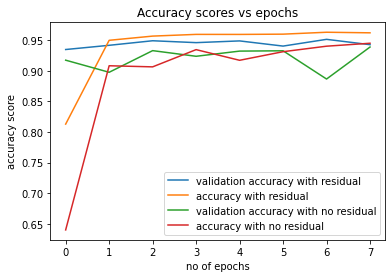

<Figure size 4320x720 with 0 Axes>

In [204]:

plt.plot(df_r['val_accuracy'], label='validation accuracy with residual')
plt.plot(df_r['accuracy'], label='accuracy with residual')
plt.plot(df_nr['val_accuracy'], label='validation accuracy with no residual')
plt.plot(df_nr['accuracy'], label='accuracy with no residual')
plt.ylabel('accuracy score')
plt.xlabel('no of epochs')
plt.title('Accuracy scores vs epochs')
plt.legend(loc="lower right")
plt.figure(figsize=(60,10))
plt.show()

In [205]:
model_deep1.evaluate_generator(test_set)

[0.207744300365448, 0.9612433910369873]

In [206]:
model_deep2.evaluate_generator(test_set)

[0.15469522774219513, 0.9551587104797363]

Here deep1 is the residual model and deep2 is the non-residual model.

From the graph and test set scores, we can see the model with skip / residual connections performed better than the one without residual connections. More than the scores. the stability of the validation scores for the residual model is much better. which indicates that it may be generalize well to other test data.